<a href="https://colab.research.google.com/github/area409/OpenSourceKeras/blob/master/01_oss_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###한림대학교 소프트웨어 융합 대학 특강

##누구나 즐기는 딥러닝: 오픈소스 Keras를 활용하여!!!
---
이정근 교수

빅데이터전공주임/오픈소스소프트웨어센터장
소프트웨어융합대학

jeonggun.lee@hallym.ac.kr
2019년 5월

---
###단순 선형 회귀


## 단순 선형 회귀

**outcome = data * 2 + 1**에 대한 식의 패턴을 학습방식을 통하여 획득하는 방법을 Keras를 활용하여 공부해보도록 합시다!

입력데이터:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

출력데이터:
outcome = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

위와 같이 주어진 데이터를 이용하여 입력과 출력에 대한 패턴(알고리즘)을 찾아낼 수 있을까요 ?

In [0]:
import numpy as np

data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
outcome = np.array([3, 5, 7, 9, 11, 13, 15, 17, 19, 21])
print(data)
print(outcome)

[ 1  2  3  4  5  6  7  8  9 10]
[ 3  5  7  9 11 13 15 17 19 21]


입력데이터와 출력 outcome과의 관계를 그래프를 통해서 살펴볼까요 ?

그래프 사용을 위해서 matplotlib를 활용하여 봅시다!

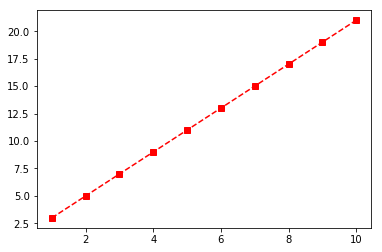

In [0]:
import matplotlib.pylab as plt
plt.plot(data, outcome, 'rs--')
plt.show()

자, 이제 학습을 위해서 모델을 만들어 봅시다!

가장 쉽게 모델을 만드는 방법은 **Sequential**을 사용하는 것입니다.

차곡차곡, 입력부터 층을 만들어 나가는 방법이지요!

층의 속성도 여러가지가 있습니다만, 여기서는 가장 간단한 **Dense** type만 사용하겠습니다.

첫 모델에는 활성화 함수 (activation function)은 사용하지 않겠습니다. 이유를 아시나요 ? ^^


In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() #모델을 시작한다는 뜻
model.add(Dense(1, input_dim=1)) #

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


모델이 만들어 졌으면, 학습 및 최적화 방법에 대한 옵션을 기술하고, 모델을 Compile하겠습니다!

In [0]:
model.compile(loss='mean_squared_error', optimizer='adam') #mean_squared_error 값들의 차이를 제곱해서(증폭해서) 그것들의 평균을 줄임(오차 줄임)

자, 이제 학습을 진행해볼까요 ? 첫 학습을 위해서 **epochs**는 10번, **batch_size**는 1로 설정하여 진행하겠습니다.

In [0]:
model.fit(data, outcome, epochs=1000, batch_size=1)#epochs --> 10번 반복해라. 사람도 한번에 못알아먹는거랑 같음. 
#loss --> 정답과 학습시킨값의 차이가 얼마나 난다 라는 뜻.

Epoch 1/1000
10/10 [==============================] - 0s 3ms/step - loss: 258.5580
Epoch 2/1000
10/10 [==============================] - 0s 3ms/step - loss: 256.9000
Epoch 3/1000
10/10 [==============================] - 0s 3ms/step - loss: 255.1008
Epoch 4/1000
10/10 [==============================] - 0s 3ms/step - loss: 253.5425
Epoch 5/1000
10/10 [==============================] - 0s 3ms/step - loss: 251.4914
Epoch 6/1000
10/10 [==============================] - 0s 3ms/step - loss: 249.8506
Epoch 7/1000
10/10 [==============================] - 0s 3ms/step - loss: 248.0919
Epoch 8/1000
10/10 [==============================] - 0s 3ms/step - loss: 246.3790
Epoch 9/1000
10/10 [==============================] - 0s 3ms/step - loss: 244.8227
Epoch 10/1000
10/10 [==============================] - 0s 3ms/step - loss: 243.0141
Epoch 11/1000
10/10 [==============================] - 0s 3ms/step - loss: 241.3392
Epoch 12/1000
10/10 [==============================] - 0s 3ms/step - loss: 239.5861
E

위의 학습 과정을 보면, epoch이 진행되기는 하지만 loss에 큰 변화가 없어보이네요. 

여러분, 어떻게 하면 좋을까요 ?

일단 학습된 모델을 가지고 새로운 data (20)에 대한 outcome을 예측해보도록 하겠습니다.

In [0]:
model.predict([20])

array([[39.91601]], dtype=float32)

답을 41로 예상을 하였는데, 생뚱 맞게 -6 정도가 나와 버렸네요.

학습을 제대로 하지 못한 경우겠지요 !

새로운 **epochs**과 **batch_size**로 학습을 다시 해보도록 하겠습니다. 여러분도 다양한 값들을 시도해보세요!

가장 적은 epoch으로 가장 적은 loss를 만들어 내는 분께 초코릿을 드리겠습니다!

In [0]:
model.fit(data, outcome, epochs=10, batch_size=1)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0674
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0667
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0664
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0658
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0645
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0640
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0635
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0630
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0623


Epoch이 진행되면서 지속적으로 loss도 떨어져서 낮은 loss를 갖도록 학습을 하였습니다. 

그럼 얼마나 잘 예측하는지 새로운 데이터를 가지고 예측을 해볼까요 ?

In [0]:
model.predict([20])

array([[40.304955]], dtype=float32)

아주 잘 예측하고 있음을 알 수 있습니다!



---


마지막으로 **가중치 (w)**와 **바이어스(b)**가 어떻게 찾아졌는지 살펴보도록 하겠습니다.

model.layers[n].get_weights()[0] : n 번째 layer의 가중차 값을 반환합니다.

model.layers[n].get_weights()[1]: n번째 layer의 바이어스 값을 반환합니다.

In [0]:
layer1_weight = model.layers[0].get_weights()[0] #Weight 값 가져오기
layer1_bias = model.layers[0].get_weights()[1]   #Bias 값 가져오기

print(layer1_weight)
print(layer1_bias)

[[1.9177884]]
[1.5602467]


우리의 예상은 layer1_weight는 2, layer1_bias는 1이기를 기대하였지만, 조금 다른 값이 나온 것을 알 수 있습니다.

하지만, 꽤 잘 찾은 것 같지 않나요 ? ^^